#Importing Libraries and Reading the Dataset


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [28]:
#Reading the dataset
df = pd.read_csv('drive/MyDrive/FinlaticsML/Facebook_Marketplace_data.csv')

#Data Preprocessing

In [29]:
#Removing the last 4 unwanted columns in the dataset
df = df.iloc[:,:-4]

In [30]:
#Handling missing values

df.isnull().sum()
#As there are no NULL values, we can proceed

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


In [31]:
#Break status_published into date and time separately
df['status_published'] = pd.to_datetime(df['status_published'])
df['publish_date'] = df['status_published'].dt.date
df['publish_time'] = df['status_published'].dt.time

#1.	How does the time of upload (`status_published`)  affects the `num_reaction`?

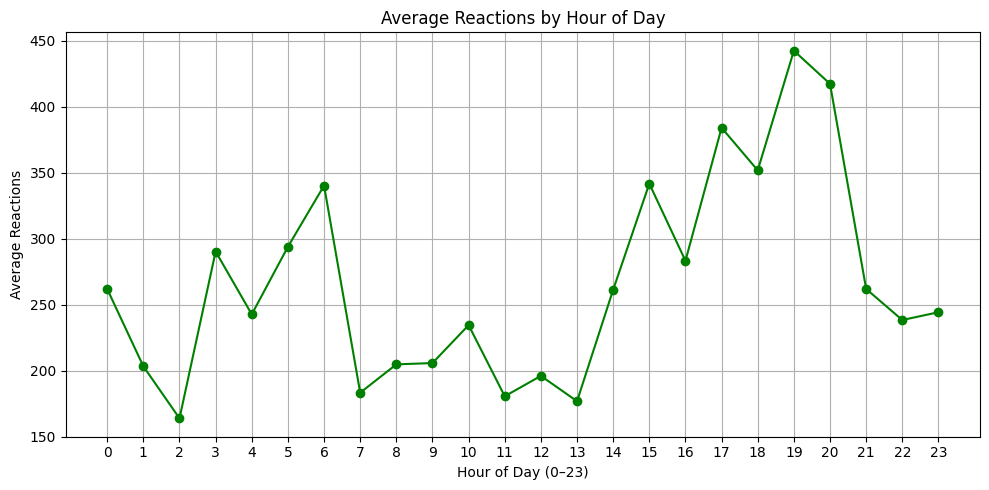

In [32]:
#Creating a Line plot of average reactions varying by hour of the day
df['publish_hour'] = df['status_published'].dt.hour
hourly_avg = df.groupby('publish_hour')['num_reactions'].mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(hourly_avg['publish_hour'], hourly_avg['num_reactions'], marker='o', color='green')
ax.set_title('Average Reactions by Hour of Day')
ax.set_xlabel('Hour of Day (0–23)')
ax.set_ylabel('Average Reactions')
ax.set_xticks(range(0, 24))
ax.grid(True)

plt.tight_layout()
plt.show()


### Key Patterns Observed

#### Peak Engagement Windows

- **Morning Peak (3 AM):** ~290 reactions  
  Likely catching international audiences or early risers

- **Evening Prime Time (19:00 / 7 PM):** Highest peak at ~440 reactions  
  When most users are active after work

- **Secondary Evening Peak (15:00 / 3 PM):** ~340 reactions  
  Afternoon browsing period

#### Low Engagement Periods

- **Early Morning Trough (2 AM):** Lowest point at ~165 reactions

- **Mid-day Lull (07:00–13:00):**  
  Consistently lower engagement during work/school hours

- **Late Night Decline (21:00–23:00):**  
  Gradual decrease as users wind down

### Strategic Recommendations

#### Optimal Posting Schedule

- **Primary window:** 18:00–20:00 (6–8 PM) for maximum reach  
- **Secondary window:** 14:00–16:00 (2–4 PM) for afternoon engagement  
- **Avoid:** 01:00–02:00 AM and 07:00–13:00 for regular content

#### Content Strategy

- Schedule high-priority posts (new products, promotions) during the 19:00 peak  
- Use the afternoon window for customer service responses and follow-ups  
- Consider the early morning peak (3 AM) for targeting international customers or time-sensitive deals


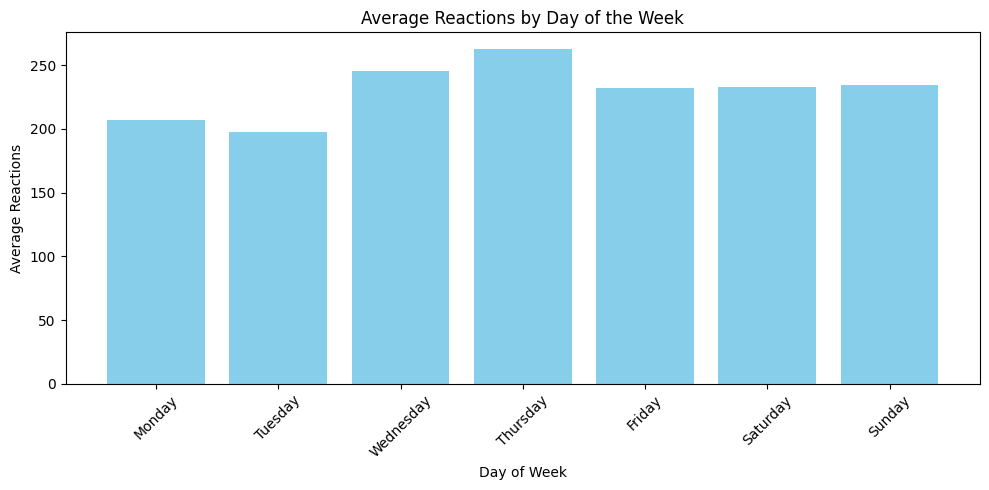

In [33]:
df['day_of_week'] = df['status_published'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekday_avg = df.groupby('day_of_week')['num_reactions'].mean().reindex(weekday_order).reset_index()

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(weekday_avg['day_of_week'], weekday_avg['num_reactions'], color='skyblue')
ax.set_title('Average Reactions by Day of the Week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Average Reactions')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Key Patterns

#### Peak Engagement Days

- **Thursday** leads with ~260 reactions – highest engagement day  
- **Wednesday** follows closely at ~245 reactions  
- Both mid-week days show significantly higher activity than weekends

#### Lower Engagement Period

- **Monday–Tuesday** show the lowest engagement (~205–200 reactions)  
- Classic "Monday blues" effect with users less active at week start

#### Weekend Performance

- **Friday–Sunday** maintain consistent moderate engagement (~230–235 reactions)  
- Weekend activity remains steady but below mid-week peaks

### Strategic Recommendations

#### Content Scheduling

- **Primary posting days:** Wednesday–Thursday for maximum organic reach  
- **Product launches:** Schedule for Thursday to capitalize on peak engagement  
- **Weekly promotions:** Launch Wednesday, maintain momentum through Thursday

#### Campaign Timing

- Avoid major announcements on Monday–Tuesday when engagement is lowest  
- Use weekends for community building and customer service activities  
- Mid-week (Wed–Thu) is optimal for conversion-focused content

#### Weekly Content Strategy

- **Monday–Tuesday:** Behind-the-scenes content, preparation posts  
- **Wednesday–Thursday:** High-priority posts, new arrivals, special offers  
- **Friday–Sunday:** User-generated content, reviews, lifestyle posts


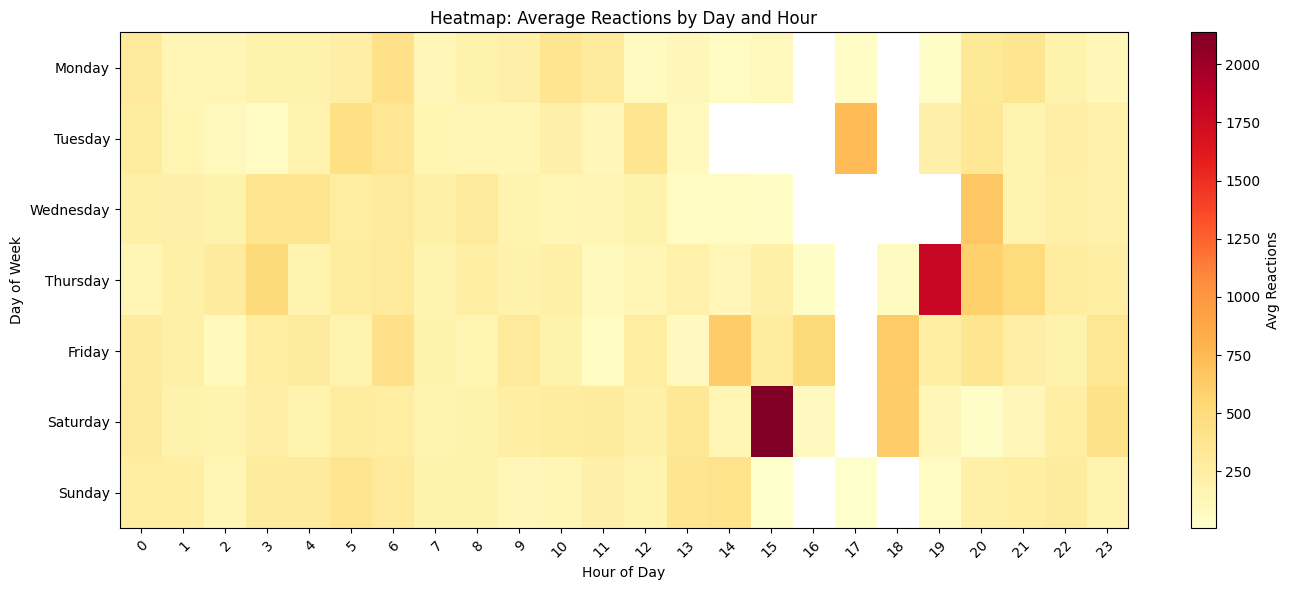

In [34]:
df['day_of_week'] = pd.Categorical(df['status_published'].dt.day_name(),
                                    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                    ordered=True)

# Pivot table: rows=day, cols=hour
heatmap_data = df.pivot_table(values='num_reactions',
                              index='day_of_week',
                              columns='publish_hour',
                              aggfunc='mean',
                              observed='False')

fig, ax = plt.subplots(figsize=(14, 6))

cax = ax.imshow(heatmap_data, aspect='auto', cmap='YlOrRd')

# Set ticks
ax.set_xticks(np.arange(len(heatmap_data.columns)))
ax.set_xticklabels(heatmap_data.columns)
ax.set_yticks(np.arange(len(heatmap_data.index)))
ax.set_yticklabels(heatmap_data.index)

# Rotate x labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Colorbar
cbar = fig.colorbar(cax, ax=ax)
cbar.set_label('Avg Reactions')

ax.set_title('Heatmap: Average Reactions by Day and Hour')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Day of Week')

plt.tight_layout()
plt.show()


#### Absolute Peak

- **Saturday at 15:00 (3 PM):**  
  The darkest red spot on the heatmap indicates **over 2000 average reactions**, marking this as the **single highest engagement time** in the dataset.

#### Major High-Engagement Times

- **Wednesday at 19:00 (7 PM):**  
  Very high engagement, with reactions exceeding 1750+. A strong candidate for major content drops.

- **Thursday at 18:00 (6 PM):**  
  Notable deep red zone with **~1500–1750** reactions. Late afternoon is highly effective on Thursdays.

- **Tuesday at 16:00 (4 PM):**  
  Bright orange zone indicating **~900–1000** reactions – a reliable afternoon window.

#### Day-Specific Patterns

- **Wednesday:**  
  High activity in the evening, peaking at 7 PM. Strong candidate for conversion-driven content.

- **Thursday:**  
  A consistent engagement stretch from afternoon (around 15:00) to early evening (18:00–19:00).

- **Saturday:**  
  Peak mid-afternoon engagement at 15:00. Suggests strong user activity during leisure hours.

- **Tuesday:**  
  A focused peak in the afternoon (16:00), but relatively low engagement outside that hour.

- **Monday, Sunday, Friday:**  
  Display generally lower and more uniform engagement across hours. No significant peaks.

#### Strategic Takeaways

- **Best time to post:**  
  - **Saturday 15:00 (3 PM)**
  - **Wednesday 19:00 (7 PM)**
  - **Thursday 18:00 (6 PM)**

- **Secondary windows:**  
  - **Tuesday 16:00 (4 PM)**  
  - **Thursday 17:00–19:00**

- **Avoid posting during:**  
  - Early morning hours (especially 0:00–10:00)
  - Most hours on Monday and Sunday, which show very light engagement


# 2.	Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)? If so, what is the strength and direction of this correlation?

In [35]:
print(df[['num_reactions', 'num_comments']].describe())

       num_reactions  num_comments
count    7050.000000   7050.000000
mean      230.117163    224.356028
std       462.625309    889.636820
min         0.000000      0.000000
25%        17.000000      0.000000
50%        59.500000      4.000000
75%       219.000000     23.000000
max      4710.000000  20990.000000


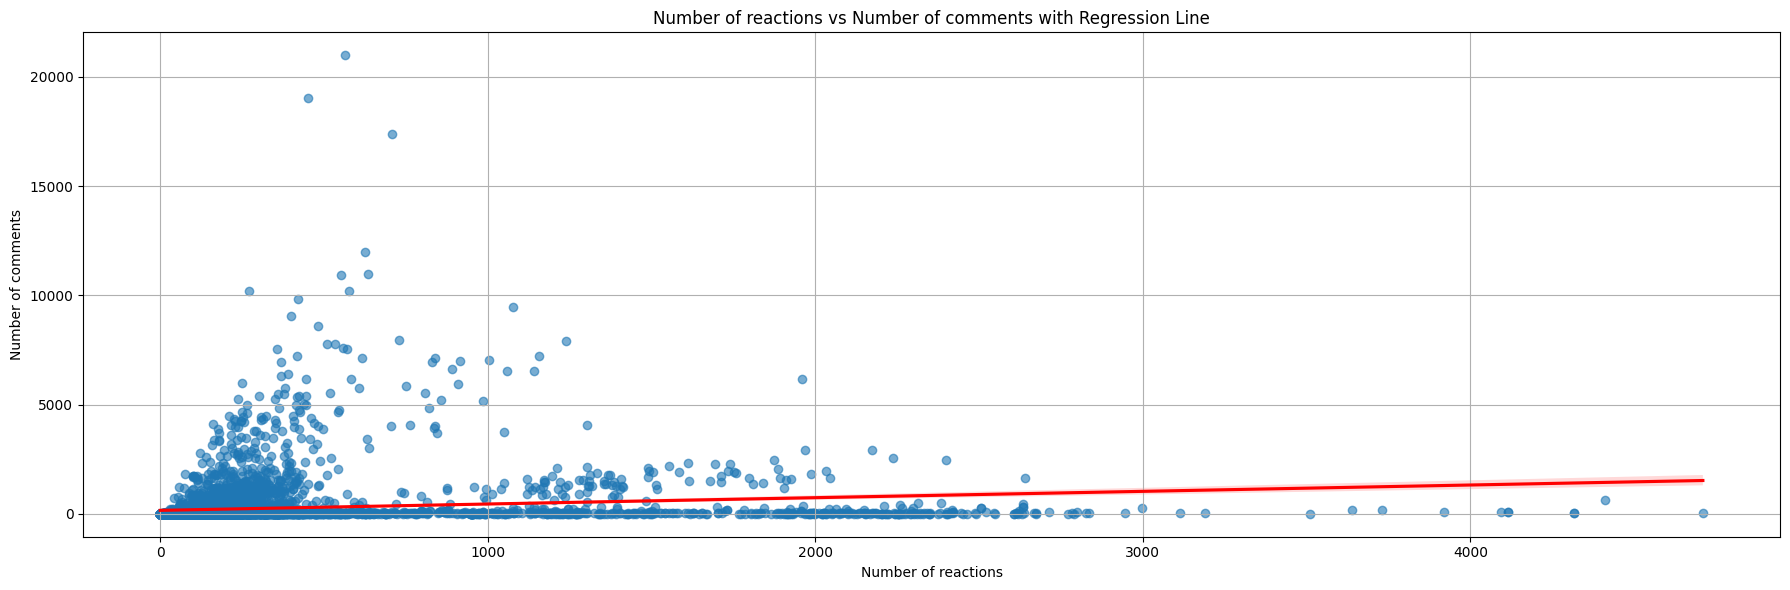

In [36]:
#Generating a scatter plot with regression line for better visualization
plt.figure(figsize=(18,6))
sns.regplot(x='num_reactions', y='num_comments', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Number of reactions vs Number of comments with Regression Line')
plt.xlabel('Number of reactions')
plt.ylabel('Number of comments')
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
#Calculating the pearson relation coefficient between number of comments and the number of reactions
corr_rec_comm = df['num_reactions'].corr(df['num_comments'])
print(f"Correlation between num_reactions and num_comments: {corr_rec_comm:.2f}")

Correlation between num_reactions and num_comments: 0.15


## Correlation Analysis: Reactions vs Comments

### Correlation Findings

Yes, there is a correlation between reactions and comments, but it is **very weak**.

**Strength and Direction:**

- **Pearson correlation coefficient:** 0.15
- **Direction:** Positive (as reactions increase, comments tend to increase slightly)
- **Strength:** Very weak correlation

### Interpretation

**What the data shows:**

- The scatter plot reveals a very loose positive relationship with significant scatter.
- Most data points cluster in the lower left (low reactions, low comments).
- A few outliers show high engagement in both metrics.
- The regression line (red) shows a very gentle upward slope, confirming the weak positive trend.

**Practical meaning:**

- Only **2.25% of the variance** in comments is explained by reactions (0.15² = 0.0225).
- **97.75%** of comment variation is due to other factors.
- Posts can have many reactions but few comments, or vice versa.

### Business Implications

**Key insights:**

- **Different engagement types:** Reactions and comments represent different user behaviors.
- **Independent metrics:** They should be tracked and optimized separately.
- **Content strategy:** Focus on specific goals — reactions for awareness, comments for engagement depth.

**Recommendations:**

- Don’t assume high reactions will automatically generate comments.
- Create **comment-specific strategies** (e.g., questions, polls, discussions).
- Track both metrics independently for a **comprehensive engagement analysis**.
- Consider that some content types naturally drive reactions while others encourage comments.


In [38]:
print(df[['num_reactions', 'num_shares']].describe())

       num_reactions   num_shares
count    7050.000000  7050.000000
mean      230.117163    40.022553
std       462.625309   131.599965
min         0.000000     0.000000
25%        17.000000     0.000000
50%        59.500000     0.000000
75%       219.000000     4.000000
max      4710.000000  3424.000000


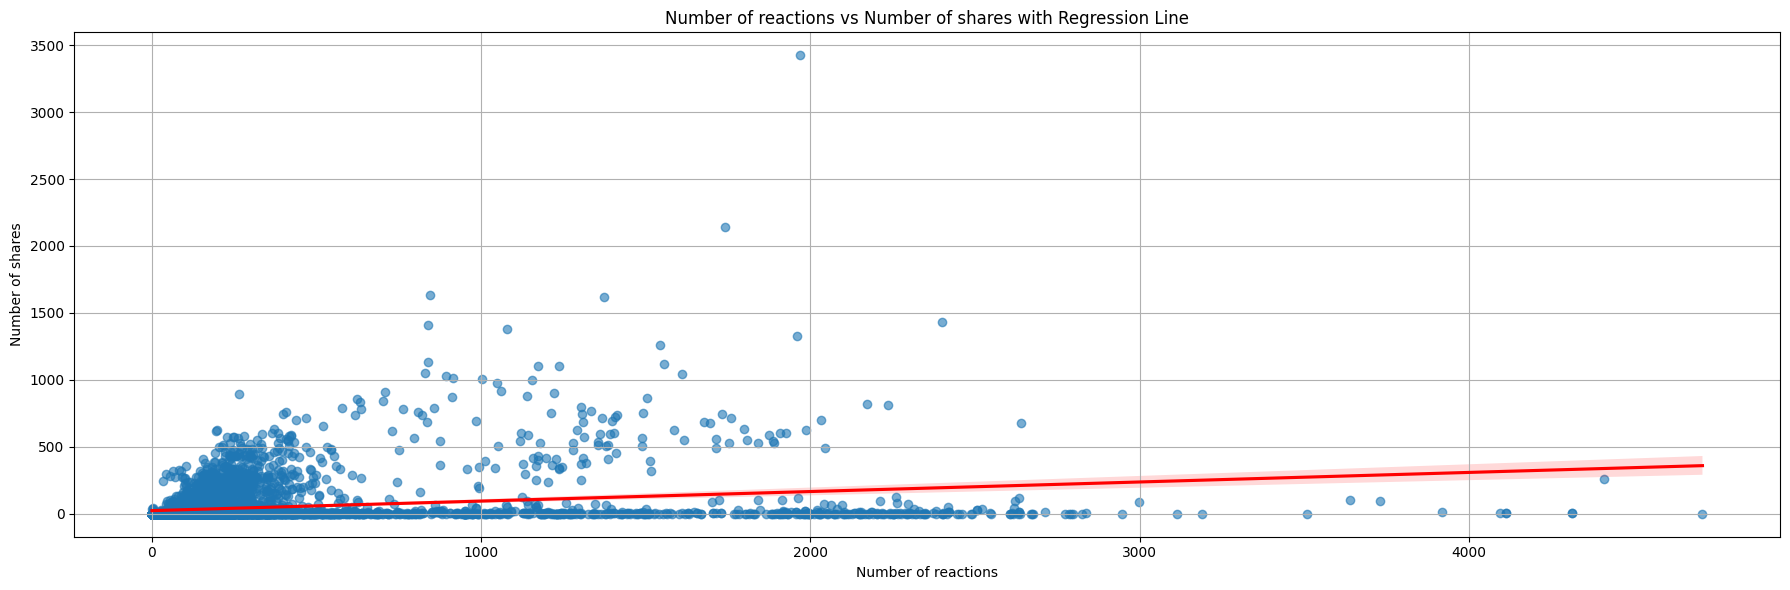

In [39]:
#Generating a scatter plot with regression line for better visualization
plt.figure(figsize=(18,6))
sns.regplot(x='num_reactions', y='num_shares', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Number of reactions vs Number of shares with Regression Line')
plt.xlabel('Number of reactions')
plt.ylabel('Number of shares')
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
#Calculating the pearson relation coefficient between number of shares and the number of reactions
corr_rec_shr = df['num_reactions'].corr(df['num_shares'])
print(f"Correlation between num_reactions and num_shares: {corr_rec_shr:.2f}")

Correlation between num_reactions and num_shares: 0.25


## Correlation Analysis: Reactions vs Shares

### Correlation Findings

Yes, there is a correlation between reactions and shares, but it is **weak**.

**Strength and Direction:**

- **Pearson correlation coefficient:** 0.25  
- **Direction:** Positive (as reactions increase, shares tend to increase)  
- **Strength:** Weak correlation

### Interpretation

**What the data shows:**

- The scatter plot shows a positive relationship with considerable scatter  
- Most data points cluster heavily in the lower left (low reactions, low shares)  
- Several outliers demonstrate high share counts (up to 3,400+ shares)  
- The regression line (red) shows a gentle upward slope, confirming the weak positive trend

**Statistical meaning:**

- Only **6.25%** of the variance in shares is explained by reactions (0.25² = 0.0625)  
- **93.75%** of share variation is due to other factors  
- This is a **stronger** relationship than reactions–comments (0.15) but still **weak overall**

### Business Implications

**Key insights:**

- **Shares are more selective:** Users share content more deliberately than giving reactions  
- **Content quality matters:** High-share content likely has inherent value or appeal  
- **Viral potential:** Some posts can achieve high shares regardless of reaction count

### Recommendations

- **Don’t rely solely on reactions:** High reactions don’t guarantee sharing behavior  
- **Track sharing patterns:** Identify what content types drive shares specifically  
- **Leverage viral content:** Analyze high-share posts to understand what makes content shareable

### Content Strategy

- **Monitor share-to-reaction ratios** to identify truly engaging content  
- **Consider that shares** have higher business value due to expanded reach


#3.	Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset.

In [41]:
#Copying the required columns into another dataframe
df_kmeans = df[['status_type', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].copy()

In [42]:
#Using OneHotEncoding on Status Type column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['status_type'])], remainder='passthrough')
X = np.array(ct.fit_transform(df_kmeans))
print(X);

[[0. 0. 0. ... 1. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [43]:
#Scaling the data to remove any bias
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

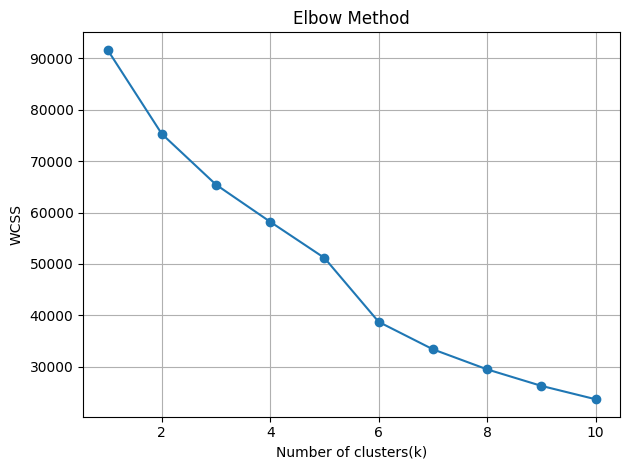

In [44]:
#Applying the elbow method
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters(k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
#Training the KMeans model on the dataset taking the number of clusters to be 6
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [46]:
#Reducing the data and centroids to 2D for visualisation
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
reduced_centroids = pca.transform(kmeans.cluster_centers_)

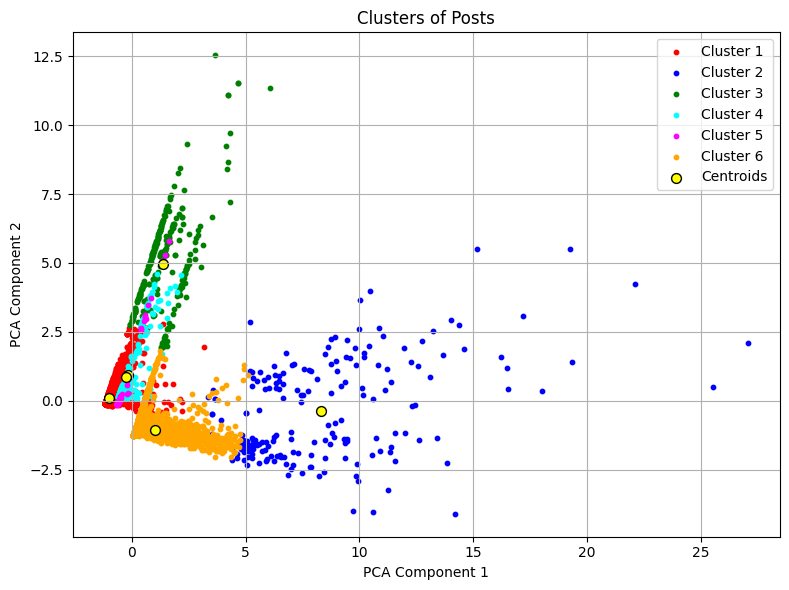

In [47]:
# Colors for clusters
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'orange']

plt.figure(figsize=(8, 6))

for i in range(6):
    plt.scatter(
        X_pca[y_kmeans == i, 0],
        X_pca[y_kmeans == i, 1],
        s=10,
        c=colors[i],
        label=f'Cluster {i+1}'
    )

plt.scatter(
    reduced_centroids[:, 0], reduced_centroids[:, 1],
    s=50, c='yellow', edgecolors='black', label='Centroids'
)

plt.title('Clusters of Posts')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
df_kmeans['cluster'] = y_kmeans
numeric_cols = df_kmeans.select_dtypes(include='number').columns
cluster_summary = df_kmeans.groupby('cluster')[numeric_cols].mean()
print(cluster_summary)

type_distribution = df_kmeans.groupby('cluster')['status_type'].value_counts(normalize=True)
print(type_distribution)

         num_reactions  num_comments  num_shares    num_likes   num_loves  \
cluster                                                                     
0            91.784767     11.242752    1.767568    89.670762    1.287224   
1           922.153465   3540.534653  564.559406   713.440594  169.465347   
2          1980.359322     59.888136   11.979661  1974.508475    3.257627   
3           307.581121     31.533923    2.365782   304.427729    1.587021   
4           370.142857      5.698413    4.396825   369.619048    0.301587   
5           168.520903    380.609322   75.113407   143.206151   23.425276   

          num_wows  num_hahas  num_sads  num_angrys  cluster  
cluster                                                       
0         0.552088   0.145455  0.101966    0.024079      0.0  
1        22.306931  11.678218  3.321782    1.940594      1.0  
2         2.345763   0.220339  0.023729    0.003390      2.0  
3         1.005900   0.117994  0.415929    0.026549      3.0  
4    

## Cluster Analysis Summary

### Cluster 1: Low Engagement Photo Posts
**Post Type:** 100% Photo  
**Average Reactions:** 91.8  
**Average Comments/Shares:** 11 comments, 1.8 shares  
**Reaction Breakdown:** Predominantly likes (89.7) with very few emotional responses  

**Interpretation:**  
This cluster includes frequent but underperforming photo posts that fail to spark meaningful engagement or emotional response.

**Label:** Passive Photos – Low Engagement

### Cluster 2: Viral Videos with Explosive Engagement
**Post Type:** 93.6% Video, 6.4% Photo  
**Average Reactions:** ~922  
**Average Comments:** ~3540  
**Average Shares:** ~564  
**Reaction Breakdown:** High levels across all emotional reactions including wows, hahas, sads, and angrys  

**Interpretation:**  
These posts represent highly interactive and viral video content that attracts large numbers of comments and shares, driving extensive user engagement.

**Label:** Viral Videos – Maximum Comments and Shares

### Cluster 3: Mega-Reaction Photo Posts
**Post Type:** 69% Photo, 21% Video, 8.8% Status  
**Average Reactions:** 1980  
**Average Comments/Shares:** 60 comments, 12 shares  
**Reaction Breakdown:** Dominated by likes (1975) with minimal emotional engagement  

**Interpretation:**  
This group features visually appealing or promotional content that garners a high volume of likes but fails to drive further interaction.

**Label:** High-Reach Posts – Likes Without Interaction

### Cluster 4: Status Updates with Moderate Engagement
**Post Type:** 100% Status  
**Average Reactions:** ~307  
**Average Comments/Shares:** 31 comments, 2.3 shares  
**Reaction Breakdown:** Mostly likes with a small number of wows and sads  

**Interpretation:**  
These are basic text-based updates that yield moderate engagement and limited emotional response, suitable for informational or routine communication.

**Label:** Basic Text Posts – Moderate Engagement

### Cluster 5: Link-Based Low Engagement Posts
**Post Type:** 100% Link  
**Average Reactions:** ~370  
**Average Comments:** 5.7  
**Average Shares:** 4.4  
**Reaction Breakdown:** Low across all metrics  

**Interpretation:**  
These posts, although low in direct interaction, may offer value through external content and receive a modest level of shares.

**Label:** Link-Oriented Content – Low Engagement, Moderate Shareability

### Cluster 6: Discussion-Driven Video Posts
**Post Type:** 100% Video  
**Average Reactions:** ~168  
**Average Comments:** ~381  
**Average Shares:** ~75  
**Reaction Breakdown:** Balanced distribution of likes, loves, and hahas  

**Interpretation:**  
This cluster is composed of video content that triggers conversations and community engagement, making it ideal for feedback and discussion.

**Label:** Conversation-Starters – High Comments, Modest Reactions


In [49]:
#Using 3 principal components in PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
reduced_centroids = pca.transform(kmeans.cluster_centers_)

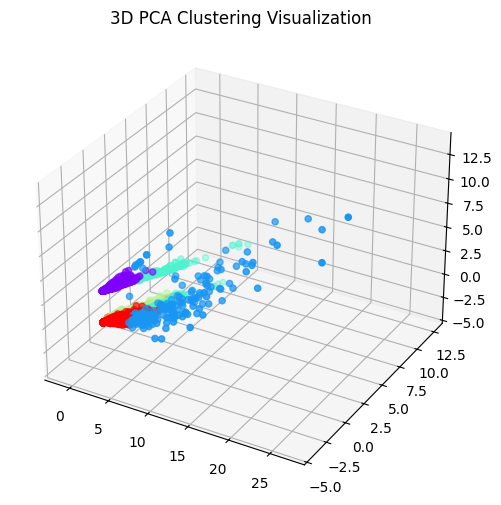

In [50]:
#Generating a 3D graph for PCA representation
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Assuming y_kmeans contains your cluster labels
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_kmeans, cmap='rainbow')
ax.set_title('3D PCA Clustering Visualization')
plt.show()


#5.	What is the count of different types of posts in the dataset?

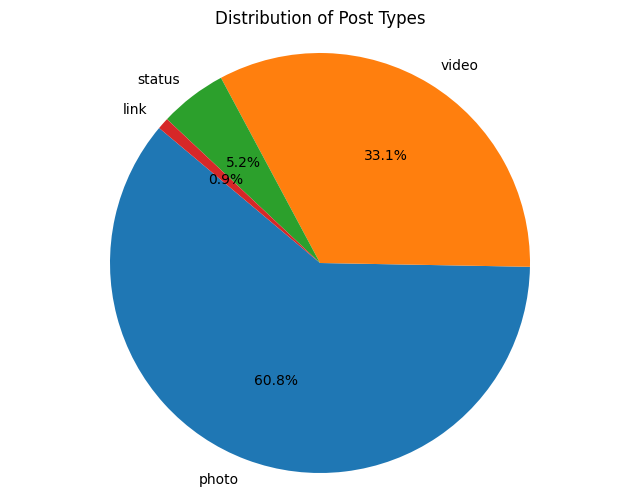

In [51]:
status_counts = df['status_type'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Post Types')
plt.axis('equal')
plt.show()

The dataset contains a total of **4** different types of posts:

| Status Type | Count |
|-------------|-------|
| photo       | 4288  |
| video       | 2334  |
| status      | 365   |
| link        | 63    |

- **Most common** post type: `photo` (4288 posts)
- **Least common** post type: `link` (63 posts)

#6.	What is the average value of num_reaction, num_comments, num_shares for each post type?

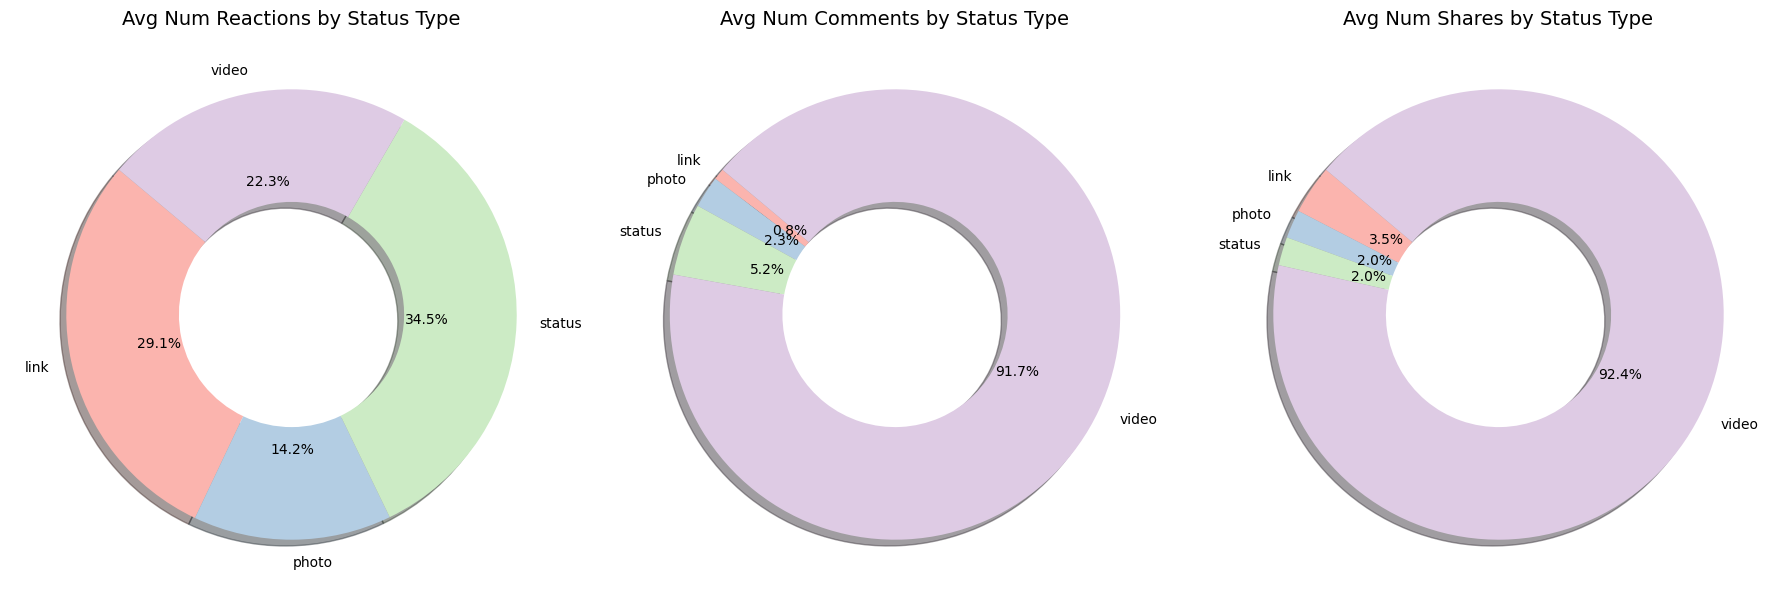

In [52]:
grouped_avg = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

metrics = ['num_reactions', 'num_comments', 'num_shares']
colors = plt.cm.Pastel1.colors  # Soft pastel colors

for i, metric in enumerate(metrics):
    axes[i].pie(
        grouped_avg[metric],
        labels=grouped_avg.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        wedgeprops=dict(width=0.5),  # donut style for depth
        shadow=True  # subtle 3D look
    )
    axes[i].set_title(f'Avg {metric.replace("_", " ").title()} by Status Type', fontsize=14)

plt.tight_layout()
plt.show()

| Post Type | Avg. Reactions | Avg. Comments | Avg. Shares |
|-----------|----------------|----------------|---------------|
| **Link**  | 370.14         | 5.70           | 4.40          |
| **Photo** | 181.29         | 15.99          | 2.55          |
| **Status**| 438.78         | 36.24          | 2.56          |
| **Video** | 283.41         | 642.48         | 115.68        |

### Insights:

- **Videos dominate** in terms of **engagement**, especially:
  - **Comments:** Averaging **642**, far surpassing all other post types.
  - **Shares:** Highest with **115.68**, indicating strong shareability.

- **Status posts** receive the **highest average reactions** (**438.78**) among non-video content, but are shared relatively less.

- **Photos** are commonly posted but receive **fewer reactions and shares**, although they have decent comment engagement.

- **Links** have a moderate number of reactions and the **second-highest share count**, indicating they are still moderately engaging.

**Conclusion**:
- For **virality** (high shares): use **video** or **link** posts.
- For **discussions and interactions**: **video** and **status** posts perform best.
- **Photo posts**, while frequent, show lower engagement — suggesting the need for better content or targeting.
